B站：同济子豪兄（https://space.bilibili.com/1900783）

微信公众号：人工智能小技巧

张子豪 2021-07-12

# 导入工具包

In [1]:
# opencv-python
import cv2

# mediapipe人工智能工具包
import mediapipe as mp

# 进度条库
from tqdm import tqdm

# 时间库
import time

# 导入python绘图matplotlib
import matplotlib.pyplot as plt
# 使用ipython的魔法方法，将绘制出的图像直接嵌入在notebook单元格中
%matplotlib inline

In [2]:
# 定义可视化图像函数
def look_img(img):
    '''opencv读入图像格式为BGR，matplotlib可视化格式为RGB，因此需将BGR转RGB'''
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

# 导入模型

In [3]:
# 导入solution
mp_pose = mp.solutions.pose

# # 导入绘图函数
mp_drawing = mp.solutions.drawing_utils 

# 导入模型
pose = mp_pose.Pose(static_image_mode=True,        # 是静态图片还是连续视频帧
                    model_complexity=2,            # 选择人体姿态关键点检测模型，0性能差但快，2性能好但慢，1介于两者之间
                    smooth_landmarks=True,         # 是否平滑关键点
                    min_detection_confidence=0.5,  # 置信度阈值
                    min_tracking_confidence=0.5)   # 追踪阈值

# 读入图像，输入模型，获取预测结果

In [4]:
# 从图片文件读入图像，opencv读入为BGR格式
img = cv2.imread('person1.jfif')
# img = cv2.imread('test.jpg')

# BGR转RGB
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 将RGB图像输入模型，获取预测结果
results = pose.process(img_RGB)

In [5]:
mp_drawing.draw_landmarks(img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

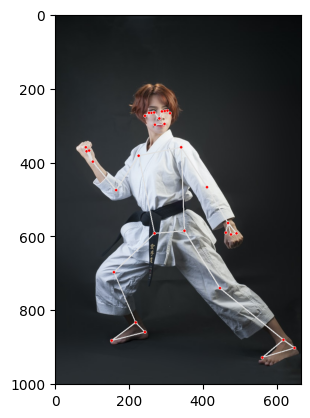

In [6]:
look_img(img)

# 获取左膝盖关键点像素坐标

In [7]:
h = img.shape[0]
w = img.shape[1]

In [8]:
# 非空，则证明检测出来了
results.pose_landmarks

landmark {
  x: 0.4239807
  y: 0.28258616
  z: -0.5893572
  visibility: 1.0
}
landmark {
  x: 0.43429264
  y: 0.26324844
  z: -0.5537395
  visibility: 0.9999999
}
landmark {
  x: 0.44603416
  y: 0.26200238
  z: -0.55443096
  visibility: 0.9999999
}
landmark {
  x: 0.45675436
  y: 0.2608501
  z: -0.5541553
  visibility: 0.9999999
}
landmark {
  x: 0.40255636
  y: 0.26598066
  z: -0.5338316
  visibility: 0.9999999
}
landmark {
  x: 0.39155602
  y: 0.26678196
  z: -0.53442883
  visibility: 0.9999999
}
landmark {
  x: 0.38181555
  y: 0.26757252
  z: -0.53460735
  visibility: 0.9999999
}
landmark {
  x: 0.4678535
  y: 0.26774293
  z: -0.3558409
  visibility: 0.9999999
}
landmark {
  x: 0.36507627
  y: 0.27536952
  z: -0.26101202
  visibility: 0.9999995
}
landmark {
  x: 0.44591364
  y: 0.2970024
  z: -0.510974
  visibility: 0.9999995
}
landmark {
  x: 0.40678707
  y: 0.29890957
  z: -0.4888055
  visibility: 0.99999905
}
landmark {
  x: 0.5124063
  y: 0.3599767
  z: -0.3647589
  visibility: 

In [9]:
# 左膝盖关键点像素坐标
cx = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE].x * w)
cy = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE].y * h)
cz = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE].z

In [10]:
print(cx, cy, cz)

446 741 -0.3959922790527344


In [11]:
# 绘制圆：图像，圆心坐标，半径，BGR颜色，最后一个参数为线宽，-1表示填充
img = cv2.circle(img,(cx,cy), 15, (255,0,0), -1)

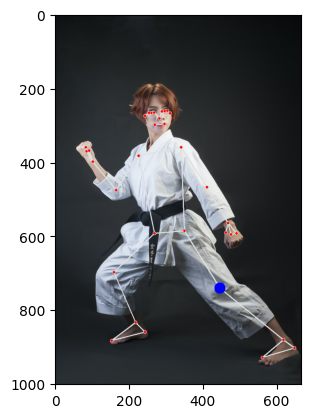

In [12]:
look_img(img)

In [14]:
# 可视化关键点及骨架连线
mp_drawing.draw_landmarks(img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

for i in range(33): # 遍历33个关键点

    # 获取该关键点的三维坐标
    cx = int(results.pose_landmarks.landmark[i].x * w)
    cy = int(results.pose_landmarks.landmark[i].y * h)
    cz = results.pose_landmarks.landmark[i].z

    radius = 10

    if i == 0: # 鼻尖
        img = cv2.circle(img,(cx,cy), radius, (0,0,255), -1)
    elif i in [11,12]: # 肩膀
        img = cv2.circle(img,(cx,cy), radius, (223,155,6), -1)
    elif i in [23,24]: # 髋关节
        img = cv2.circle(img,(cx,cy), radius, (1,240,255), -1)
    elif i in [13,14]: # 胳膊肘
        img = cv2.circle(img,(cx,cy), radius, (140,47,240), -1)
    elif i in [25,26]: # 膝盖
        img = cv2.circle(img,(cx,cy), radius, (0,0,255), -1)
    elif i in [15,16,27,28]: # 手腕和脚腕
        img = cv2.circle(img,(cx,cy), radius, (223,155,60), -1)
    elif i in [17,19,21]: # 左手
        img = cv2.circle(img,(cx,cy), radius, (94,218,121), -1)
    elif i in [18,20,22]: # 右手
        img = cv2.circle(img,(cx,cy), radius, (16,144,247), -1)
    elif i in [27,29,31]: # 左脚
        img = cv2.circle(img,(cx,cy), radius, (29,123,243), -1)
    elif i in [28,30,32]: # 右脚
        img = cv2.circle(img,(cx,cy), radius, (193,182,255), -1)
    elif i in [9,10]: # 嘴
        img = cv2.circle(img,(cx,cy), radius, (205,235,255), -1)
    elif i in [1,2,3,4,5,6,7,8]: # 眼及脸颊
        img = cv2.circle(img,(cx,cy), radius, (94,218,121), -1)
    else: # 其它关键点
        img = cv2.circle(img,(cx,cy), radius, (0,255,0), -1)
        
# scaler = 1
# img = cv2.putText(img, handness_str, (25 * scaler, 100 * scaler), cv2.FONT_HERSHEY_SIMPLEX, 1.25 * scaler, (255, 0, 255), 2 * scaler)
# img = cv2.putText(img, index_finger_tip_str, (25 * scaler, 150 * scaler), cv2.FONT_HERSHEY_SIMPLEX, 1.25 * scaler, (255, 0, 255), 2 * scaler)

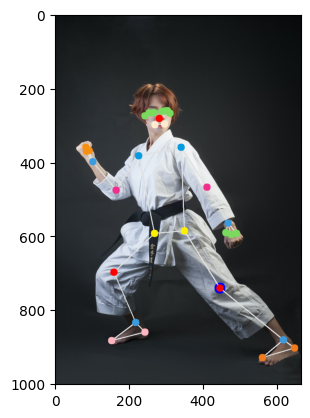

In [15]:
look_img(img)

# 整理代码

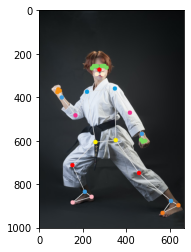

True

In [15]:
# opencv-python
import cv2
# mediapipe人工智能工具包
import mediapipe as mp
# 进度条库
from tqdm import tqdm
# 时间库
import time
# 导入python绘图matplotlib
import matplotlib.pyplot as plt
# 使用ipython的魔法方法，将绘制出的图像直接嵌入在notebook单元格中
%matplotlib inline

# 定义可视化图像函数
def look_img(img):
    '''opencv读入图像格式为BGR，matplotlib可视化格式为RGB，因此需将BGR转RGB'''
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

# 导入solution
mp_pose = mp.solutions.pose

# # 导入绘图函数
mp_drawing = mp.solutions.drawing_utils 

# 导入模型
pose = mp_pose.Pose(static_image_mode=True,        # 是静态图片还是连续视频帧
                    model_complexity=1,            # 选择人体姿态关键点检测模型，0最快但性能差，2性能好但是慢
                    smooth_landmarks=True,         # 是否平滑关键点
                    min_detection_confidence=0.5,  # 置信度阈值
                    min_tracking_confidence=0.5)   # 追踪阈值

# 从图片文件读入图像，opencv读入为BGR格式
img = cv2.imread('person1.jfif')
# img = cv2.imread('test.jpg')

# BGR转RGB
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# 将RGB图像输入模型，获取预测结果
results = pose.process(img_RGB)

if results.pose_landmarks: # 若检测出人体关键点
    
    # 可视化关键点及骨架连线
    mp_drawing.draw_landmarks(img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    for i in range(33): # 遍历所有33个关键点，可视化

        # 获取该关键点的三维坐标
        cx = int(results.pose_landmarks.landmark[i].x * w)
        cy = int(results.pose_landmarks.landmark[i].y * h)
        cz = results.pose_landmarks.landmark[i].z

        radius = 10

        if i == 0: # 鼻尖
            img = cv2.circle(img,(cx,cy), radius, (0,0,255), -1)
        elif i in [11,12]: # 肩膀
            img = cv2.circle(img,(cx,cy), radius, (223,155,6), -1)
        elif i in [23,24]: # 髋关节
            img = cv2.circle(img,(cx,cy), radius, (1,240,255), -1)
        elif i in [13,14]: # 胳膊肘
            img = cv2.circle(img,(cx,cy), radius, (140,47,240), -1)
        elif i in [25,26]: # 膝盖
            img = cv2.circle(img,(cx,cy), radius, (0,0,255), -1)
        elif i in [15,16,27,28]: # 手腕和脚腕
            img = cv2.circle(img,(cx,cy), radius, (223,155,60), -1)
        elif i in [17,19,21]: # 左手
            img = cv2.circle(img,(cx,cy), radius, (94,218,121), -1)
        elif i in [18,20,22]: # 右手
            img = cv2.circle(img,(cx,cy), radius, (16,144,247), -1)
        elif i in [27,29,31]: # 左脚
            img = cv2.circle(img,(cx,cy), radius, (29,123,243), -1)
        elif i in [28,30,32]: # 右脚
            img = cv2.circle(img,(cx,cy), radius, (193,182,255), -1)
        elif i in [9,10]: # 嘴
            img = cv2.circle(img,(cx,cy), radius, (205,235,255), -1)
        elif i in [1,2,3,4,5,6,7,8]: # 眼及脸颊
            img = cv2.circle(img,(cx,cy), radius, (94,218,121), -1)
        else: # 其它关键点
            img = cv2.circle(img,(cx,cy), radius, (0,255,0), -1)

    # 展示图片
    look_img(img)
    
else:
    print('从图像中未检测出人体关键点，报错。')

# 保存图片
cv2.imwrite('D.jpg',img)